Source:
 * Sandeep Mistry - Arduino
 * Don Coleman - Chariot Solutions
https://github.com/arduino/ArduinoTensorFlowLiteTutorials/
---
Full repository: https://github.com/trinadia/safesistance/ <br>
Datasets:
- [fall.csv](https://github.com/trinadia/safesistance/blob/main/model/fall.csv)
- [walk.csv](https://github.com/trinadia/safesistance/blob/main/model/walk.csv)

### About Safesistance
Safesistance adalah sebuah alat berbentuk gelang yang dipasangkan pada lengan untuk membantuk mendeteksi gerakan jatuh pada pengguna dan gestur meminta pertolongan (SOS), di mana sinyal ini akan direspon dengan notifikasi dari chatbot di smartphone. Cara kerja dari alat ini adalah sensor gyroscope dan accelerometer dihubungkan dengan mikrokontroler untuk proses ekstraksi data, kemudian data tersebut diolah dan melalui proses _training_ dengan model Deep Learning. Penggunaan Deep Learning ini adalah untuk "mengenali" gerakan si pengguna yang nantinya akan memberi _output_ berupa klasifikasi gerakan, yakni "walk" saat pengguna berjalan dan "fall" saat pengguna jatuh.

## Setup Python Environment

In [ ]:
# Setup environment
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
!pip install tensorflow

# Upload Data

# Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = "wave.csv"

df = pd.read_csv("/content/" + filename)
df.head()

,aX,aY,aZ,gX,gY,gZ
0,0.728,1.099,-0.749,57.312,56.763,64.758
1,0.734,1.206,-0.826,50.415,94.604,86.426
2,0.667,1.434,-1.047,39.063,102.722,85.083
3,0.618,1.565,-1.140,27.100,98.450,72.449
4,0.551,1.698,-1.206,31.067,59.753,18.616


In [ ]:
df['aX'][0]

0.728

<ipython-input-13-5a2c472c73dd>:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-13-5a2c472c73dd>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-13-5a2c472c73dd>:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


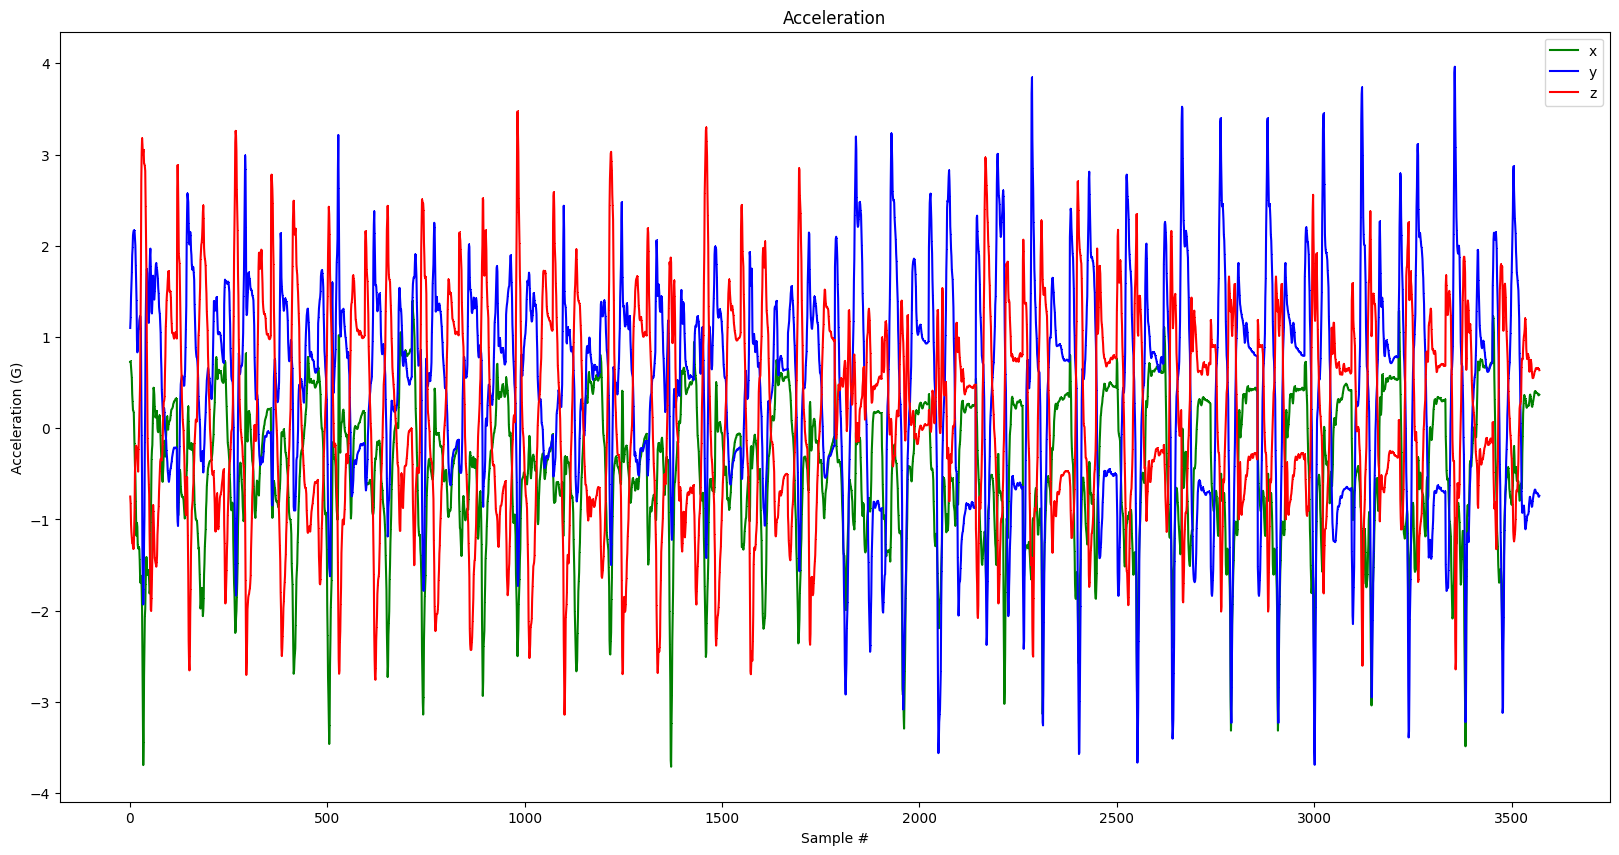

<ipython-input-13-5a2c472c73dd>:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-13-5a2c472c73dd>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-13-5a2c472c73dd>:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')


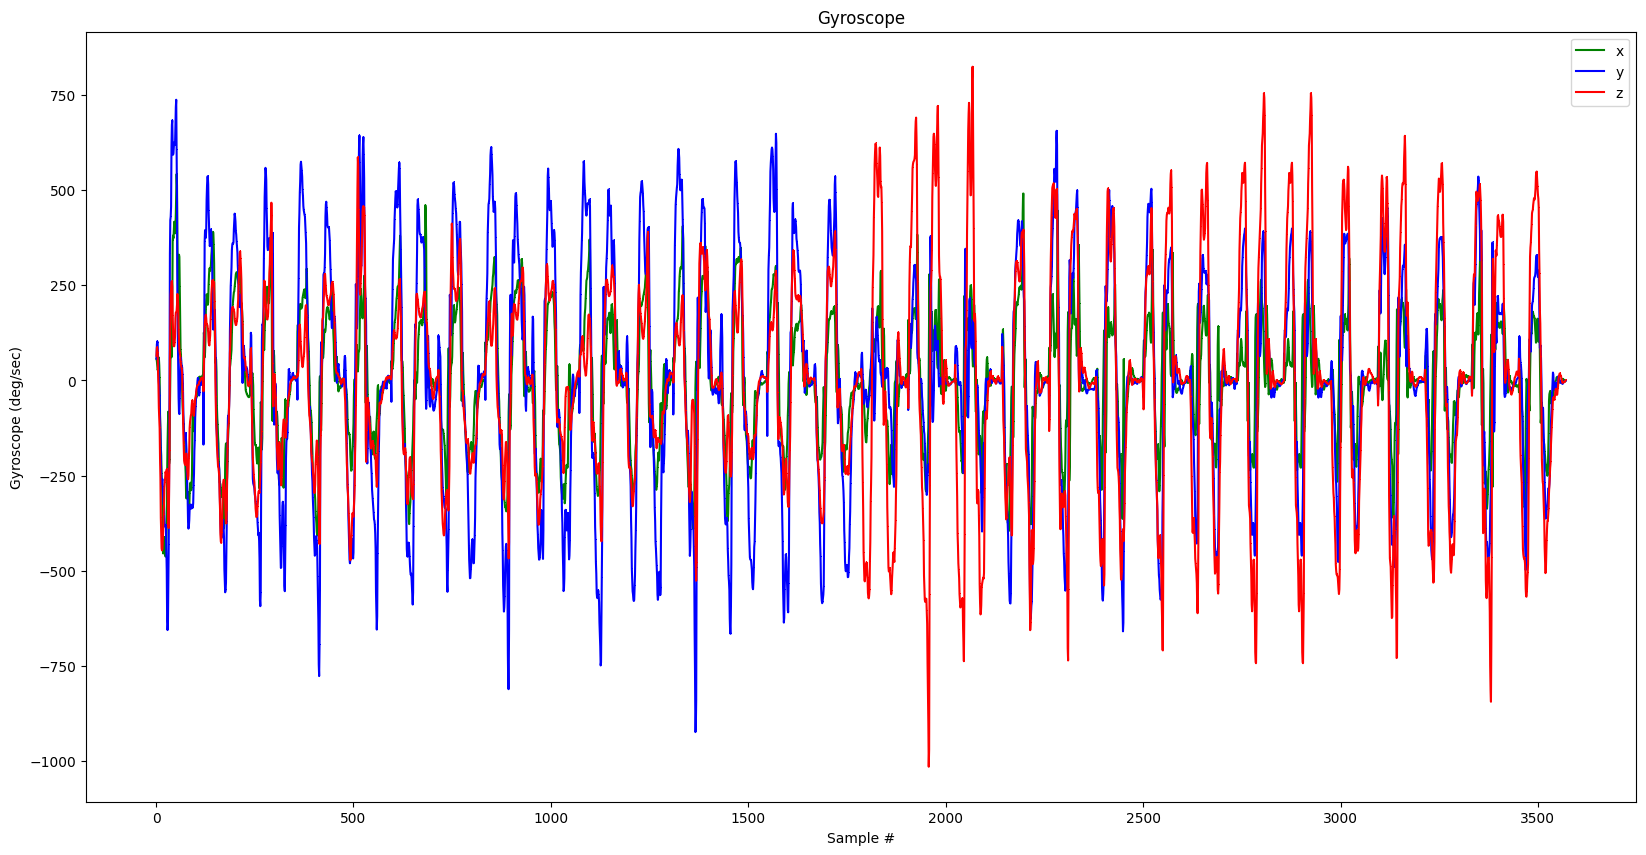

In [ ]:
index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()


<ipython-input-19-cb8f80be12da>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'][:119], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-19-cb8f80be12da>:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'][:119], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-19-cb8f80be12da>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'][:119], 'r.', label='z', linestyle='solid', marker=',')


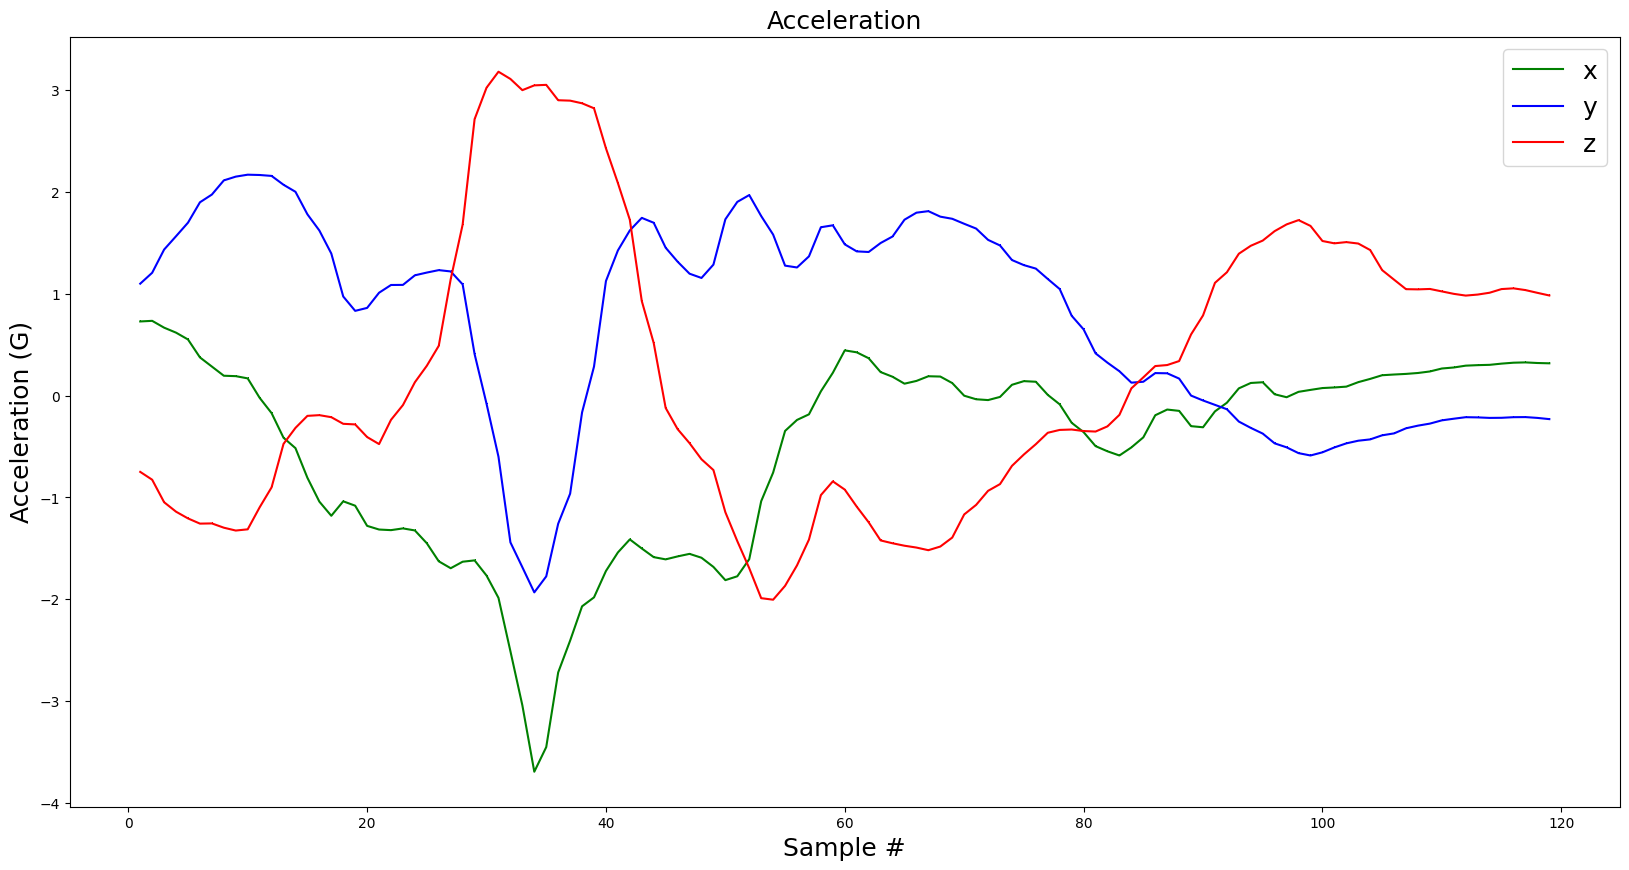

<ipython-input-19-cb8f80be12da>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'][:119], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-19-cb8f80be12da>:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'][:119], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-19-cb8f80be12da>:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'][:119], 'r.', label='z', linestyle='solid', marker=',')


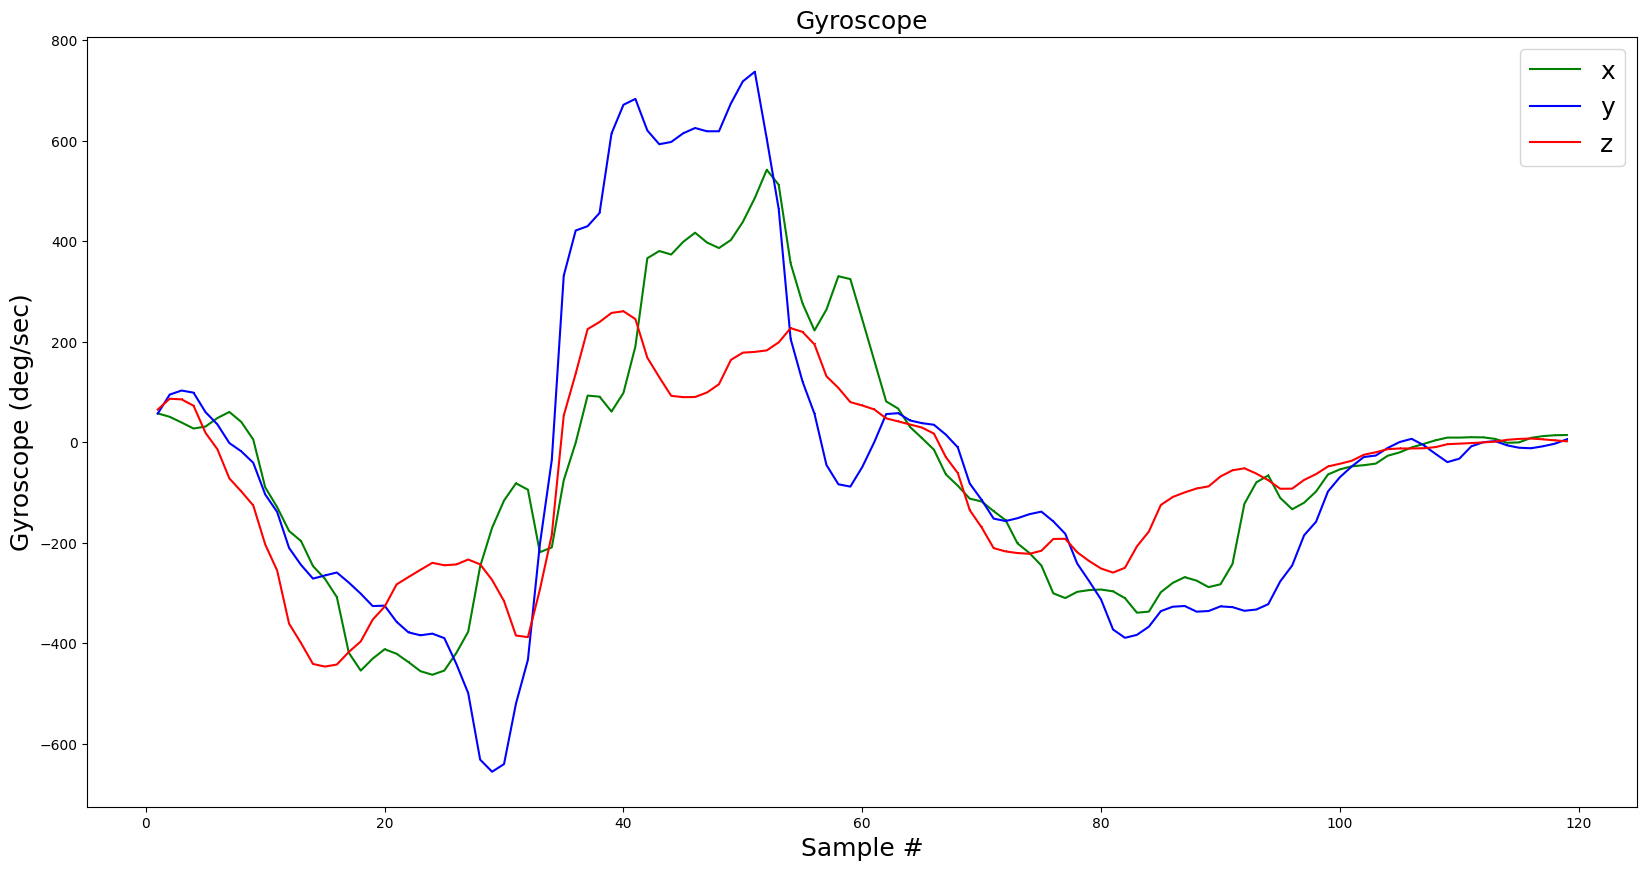

In [ ]:
# index = range(1, len(df['aX']) + 1)
index = range(1, 120)

# plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'][:119], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'][:119], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'][:119], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration", fontsize=18)
plt.xlabel("Sample #", fontsize=18)
plt.ylabel("Acceleration (G)", fontsize=18)
plt.legend(fontsize=18)
plt.show()

plt.plot(index, df['gX'][:119], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'][:119], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'][:119], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope", fontsize=18)
plt.xlabel("Sample #", fontsize=18)
plt.ylabel("Gyroscope (deg/sec)", fontsize=18)
plt.legend(fontsize=18)
plt.show()


In [ ]:
df2 = pd.read_csv("/content/fall.csv")

<ipython-input-18-cbef9a5ed101>:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df2['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-18-cbef9a5ed101>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df2['aY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-18-cbef9a5ed101>:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df2['aZ'], 'r.', label='z', linestyle='solid', marker=',')


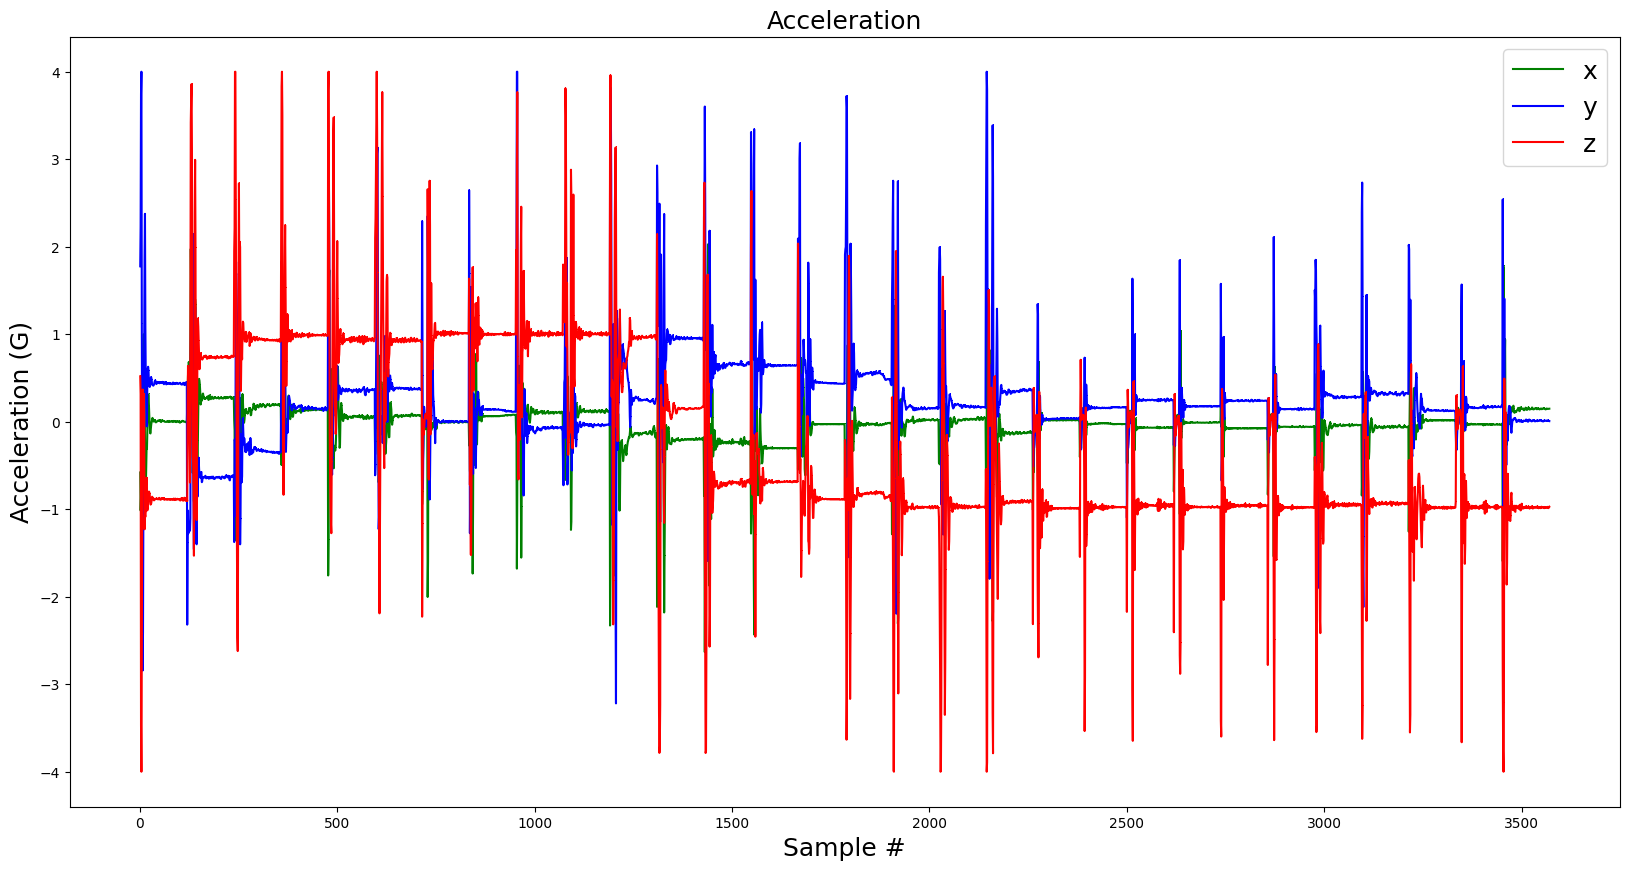

<ipython-input-18-cbef9a5ed101>:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df2['gX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-18-cbef9a5ed101>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df2['gY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-18-cbef9a5ed101>:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df2['gZ'], 'r.', label='z', linestyle='solid', marker=',')


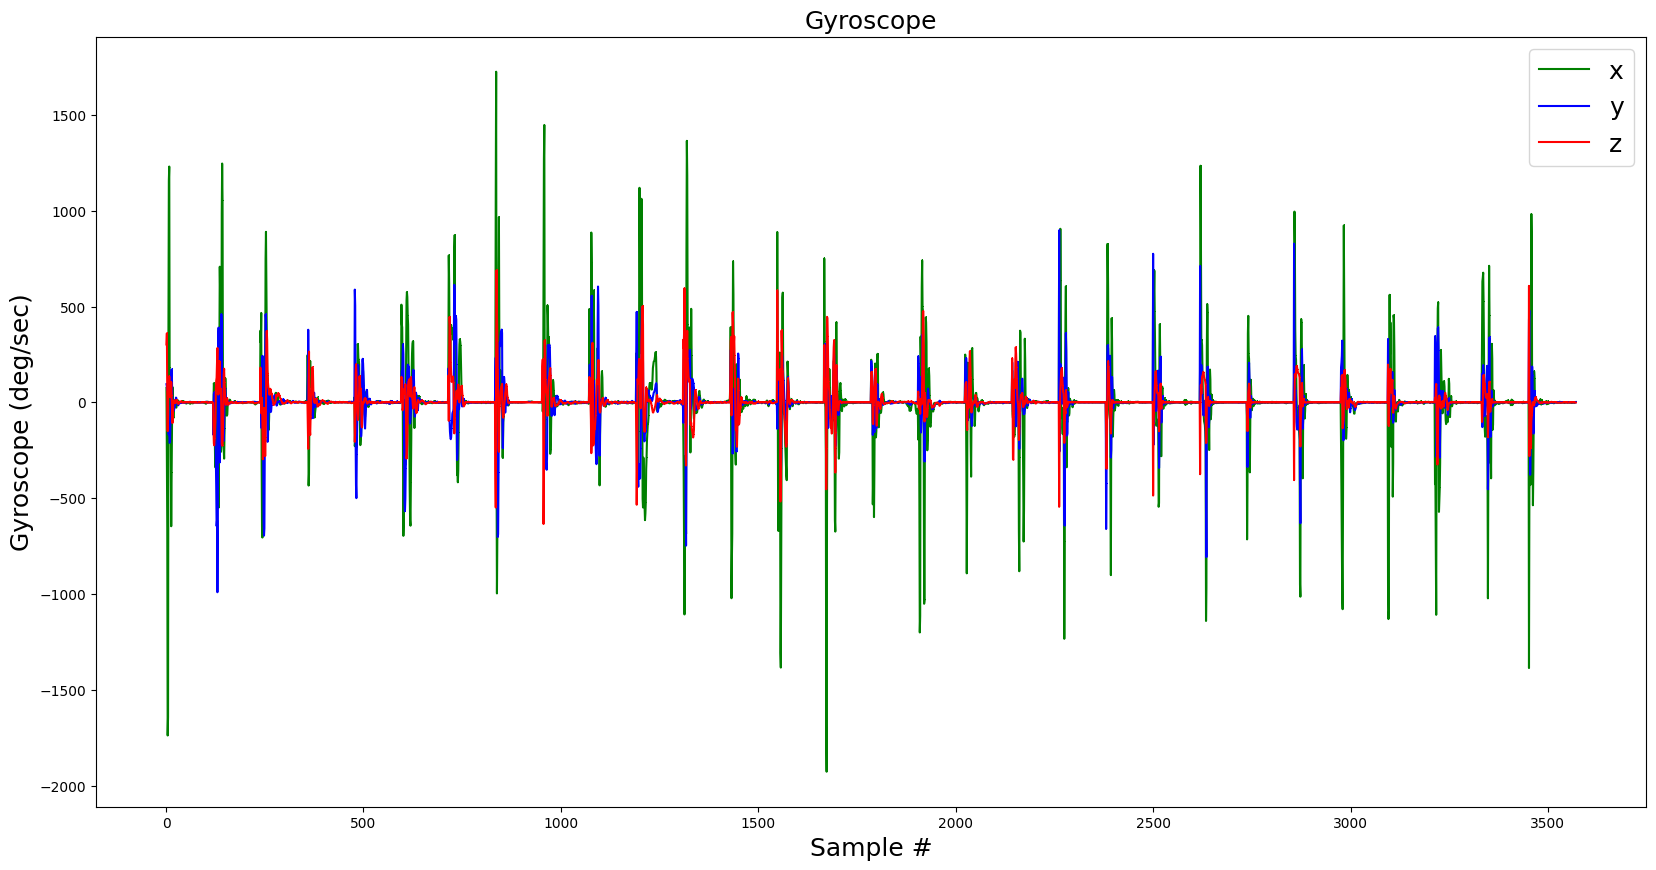

In [ ]:
index = range(1, len(df2['aX']) + 1)

# plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df2['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df2['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df2['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration", fontsize=18)
plt.xlabel("Sample #", fontsize=18)
plt.ylabel("Acceleration (G)", fontsize=18)
plt.legend(fontsize=18)
plt.show()

plt.plot(index, df2['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df2['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df2['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope", fontsize=18)
plt.xlabel("Sample #", fontsize=18)
plt.ylabel("Gyroscope (deg/sec)", fontsize=18)
plt.legend(fontsize=18)
plt.show()


<ipython-input-17-90cec10addea>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df2['aX'][:119], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-17-90cec10addea>:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df2['aY'][:119], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-17-90cec10addea>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df2['aZ'][:119], 'r.', label='z', linestyle='solid', marker=',')


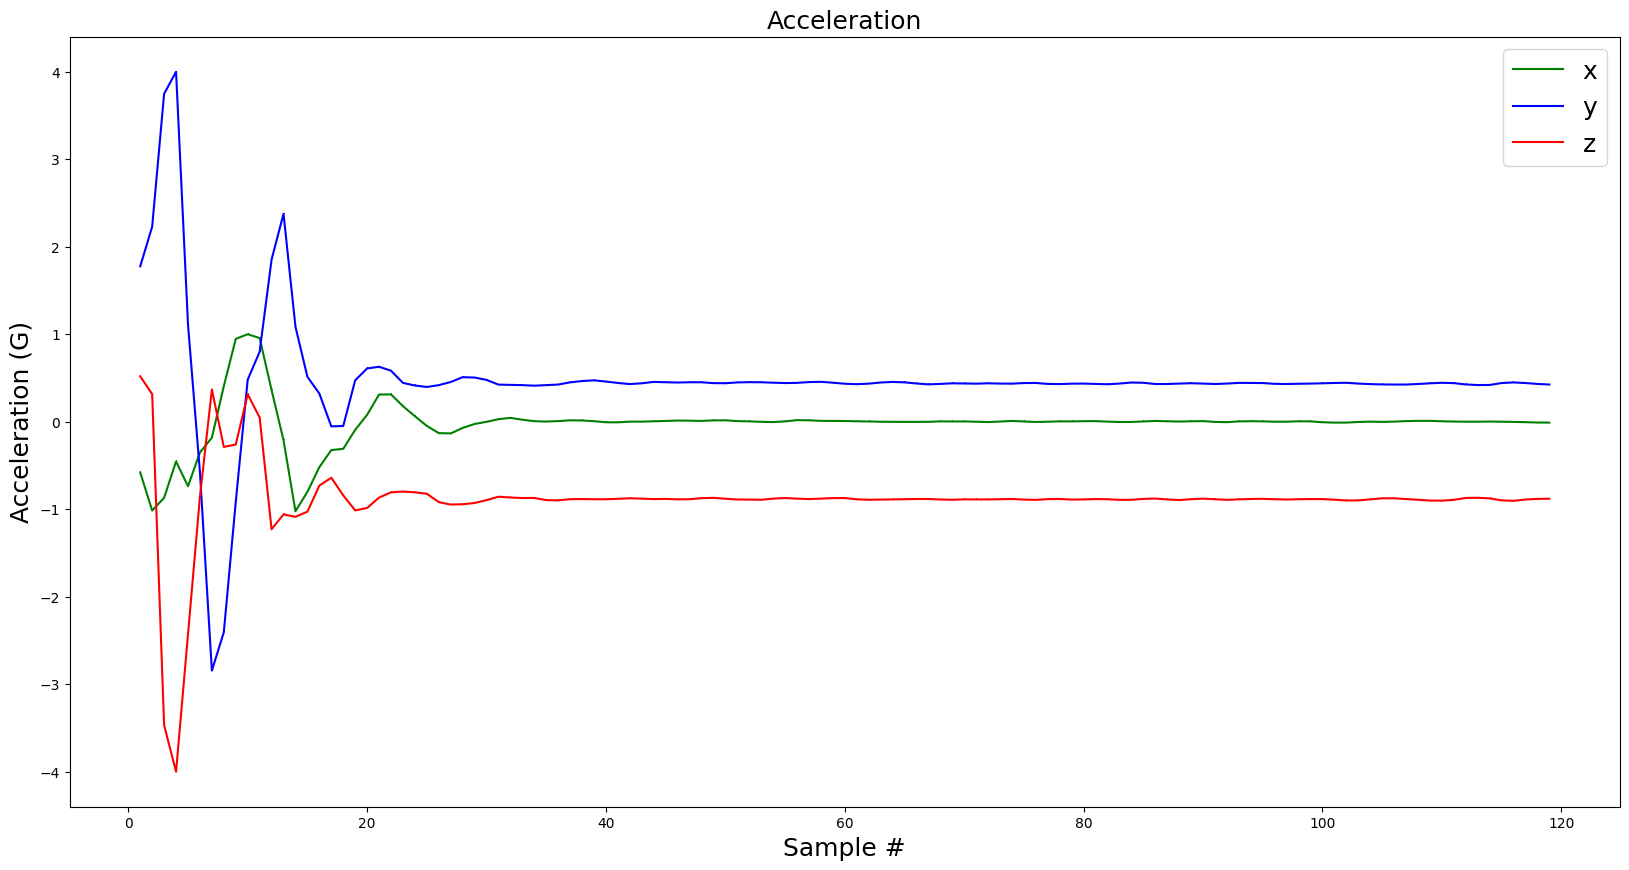

<ipython-input-17-90cec10addea>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df2['gX'][:119], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-17-90cec10addea>:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df2['gY'][:119], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-17-90cec10addea>:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df2['gZ'][:119], 'r.', label='z', linestyle='solid', marker=',')


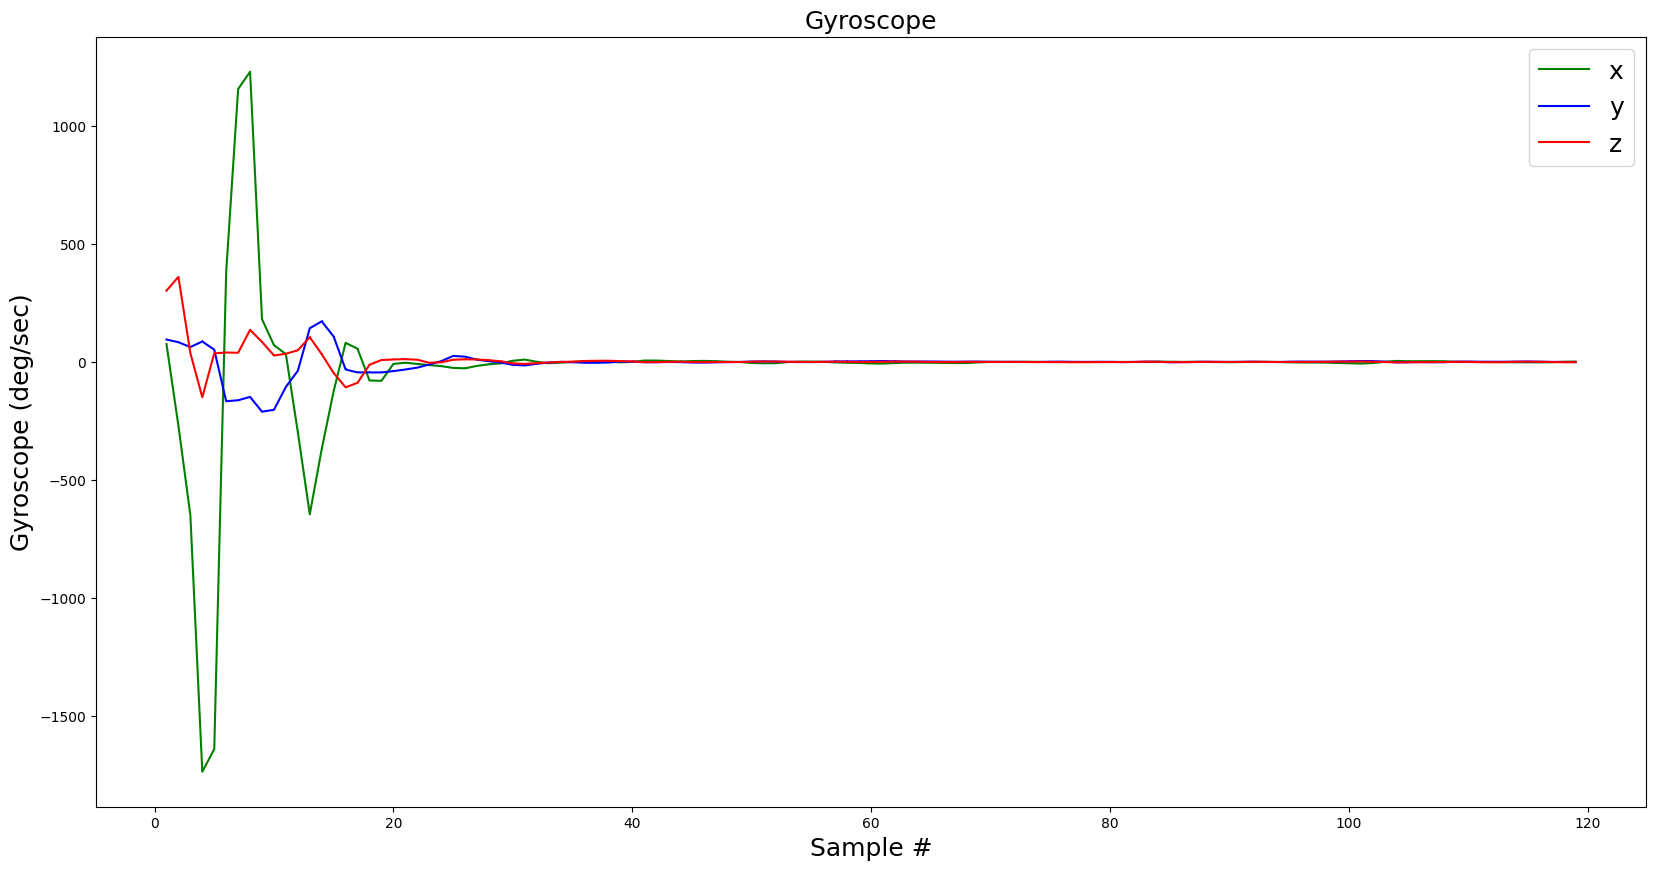

In [ ]:
# index = range(1, len(df['aX']) + 1)
index = range(1, 120)

# plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df2['aX'][:119], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df2['aY'][:119], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df2['aZ'][:119], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration", fontsize=18)
plt.xlabel("Sample #", fontsize=18)
plt.ylabel("Acceleration (G)", fontsize=18)
plt.legend(fontsize=18)
plt.show()

plt.plot(index, df2['gX'][:119], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df2['gY'][:119], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df2['gZ'][:119], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope", fontsize=18)
plt.xlabel("Sample #", fontsize=18)
plt.ylabel("Gyroscope (deg/sec)", fontsize=18)
plt.legend(fontsize=18)
plt.show()


In [ ]:
df.shape[0]/119

30.0

# Train Neural Network





In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(f"TensorFlow version = {tf.__version__}\n")

SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures
GESTURES = [
    "wave",
    "fall",
]

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")

  output = ONE_HOT_ENCODED_GESTURES[gesture_index]

  df = pd.read_csv("/content/" + gesture + ".csv")

  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")

  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

TensorFlow version = 2.12.0

Processing index 0 for gesture 'wave'.
	There are 30 recordings of the wave gesture.
Processing index 1 for gesture 'fall'.
	There are 30 recordings of the fall gesture.
Data set parsing and preparation complete.


In [ ]:
inputs.shape
# (60,714)
# - 30 recordings x 2 gestures
# - 119 samples x 6 axis IMU

(60, 714)

## Randomize and split the input and output pairs for training

Randomly split input and output pairs into sets of data: 60% for training, 20% for validation, and 20% for testing.

  - the training set is used to train the model
  - the validation set is used to measure how well the model is performing during training
  - the testing set is used to test the model after training

In [ ]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


## Build & Train the Model

Build and train a [TensorFlow](https://www.tensorflow.org) model using the high-level [Keras](https://www.tensorflow.org/guide/keras) API.

In [ ]:
# build the model and train it
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(150, activation='relu'))
# model.add(tf.keras.layers.Dense(100, activation='relu')) #125
model.add(tf.keras.layers.Dense(50, activation='relu'))
# model.add(tf.keras.layers.Dense(25, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=500, batch_size=1, validation_data=(inputs_validate, outputs_validate)) #3, adam



Epoch 1/500
36/36 [==============================] - 1s 7ms/step - loss: 0.2748 - mae: 0.5088 - val_loss: 0.2469 - val_mae: 0.4969
Epoch 2/500
36/36 [==============================] - 0s 3ms/step - loss: 0.2462 - mae: 0.4828 - val_loss: 0.2525 - val_mae: 0.5023
Epoch 3/500
36/36 [==============================] - 0s 3ms/step - loss: 0.2485 - mae: 0.4966 - val_loss: 0.2851 - val_mae: 0.5281
Epoch 4/500
36/36 [==============================] - 0s 3ms/step - loss: 0.2465 - mae: 0.4876 - val_loss: 0.2915 - val_mae: 0.5320
Epoch 5/500
36/36 [==============================] - 0s 3ms/step - loss: 0.2455 - mae: 0.4831 - val_loss: 0.2890 - val_mae: 0.5302
Epoch 6/500
36/36 [==============================] - 0s 3ms/step - loss: 0.2445 - mae: 0.4842 - val_loss: 0.2948 - val_mae: 0.5338
Epoch 7/500
36/36 [==============================] - 0s 3ms/step - loss: 0.2443 - mae: 0.4812 - val_loss: 0.2907 - val_mae: 0.5309
Epoch 8/500
36/36 [==============================] - 0s 3ms/step - loss: 0.2431 - m

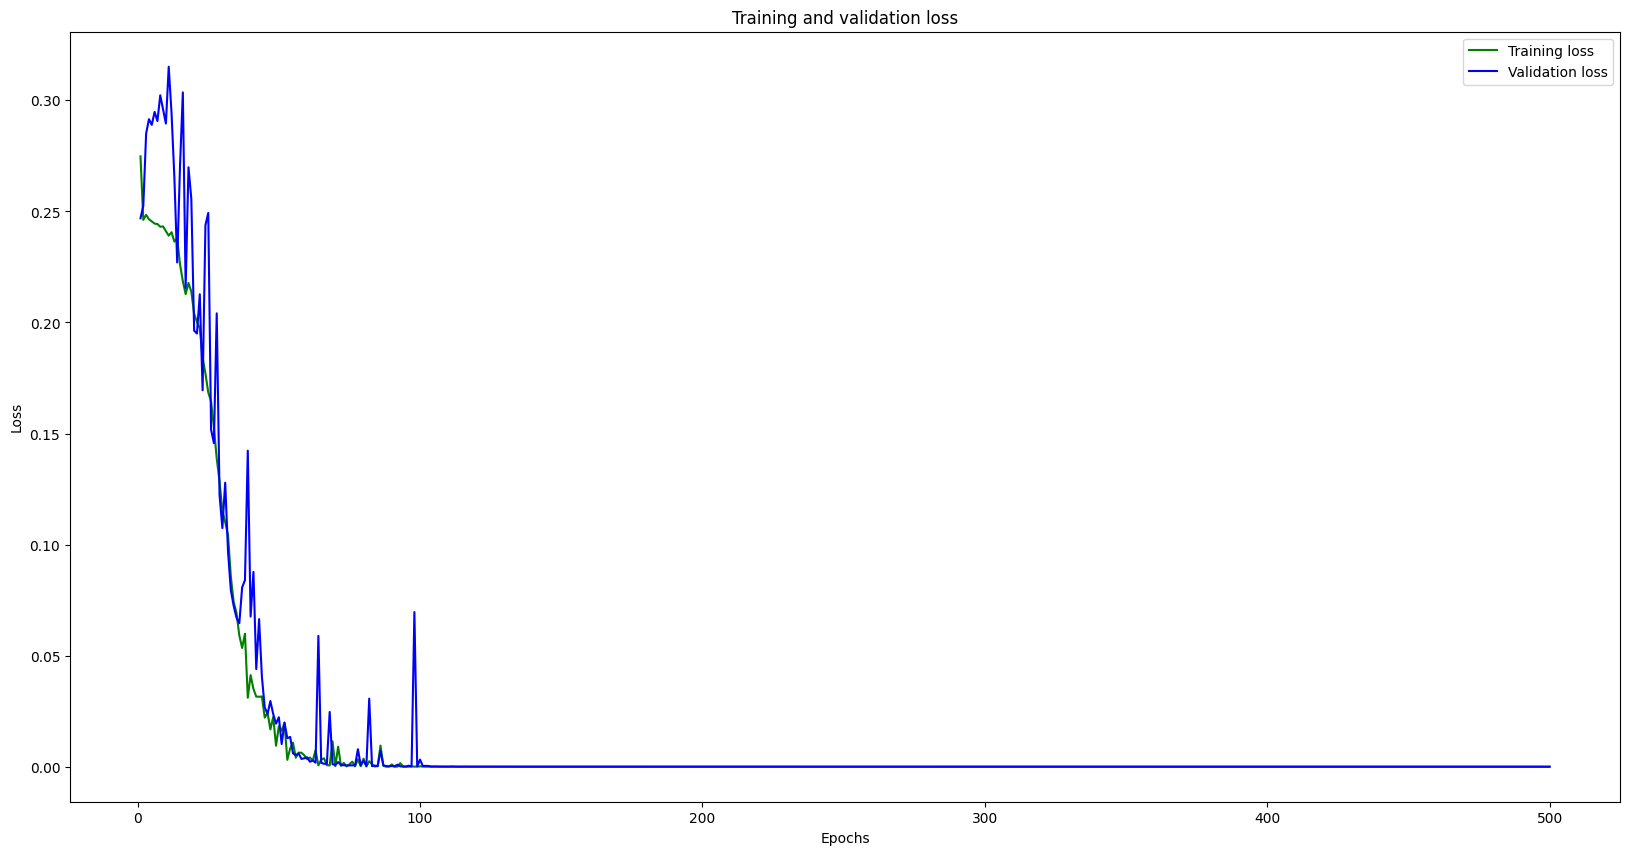

[20.0, 10.0]


In [ ]:
# ADAM
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

## Verify

Graph the models performance vs validation.


### Loss

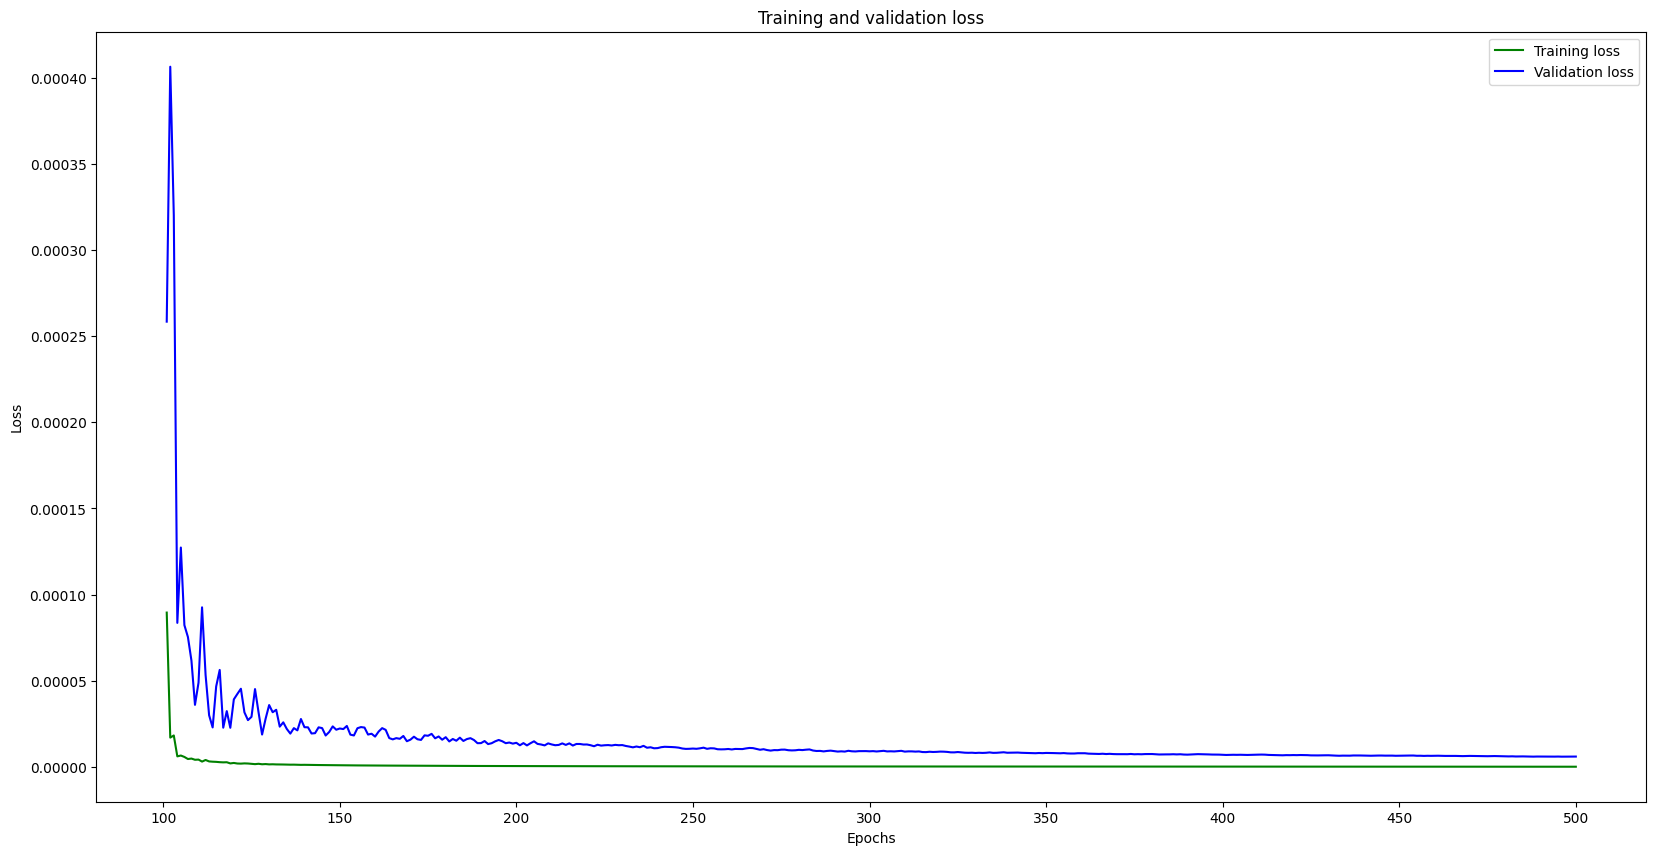

In [ ]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Mean Absolute Error (MAE)



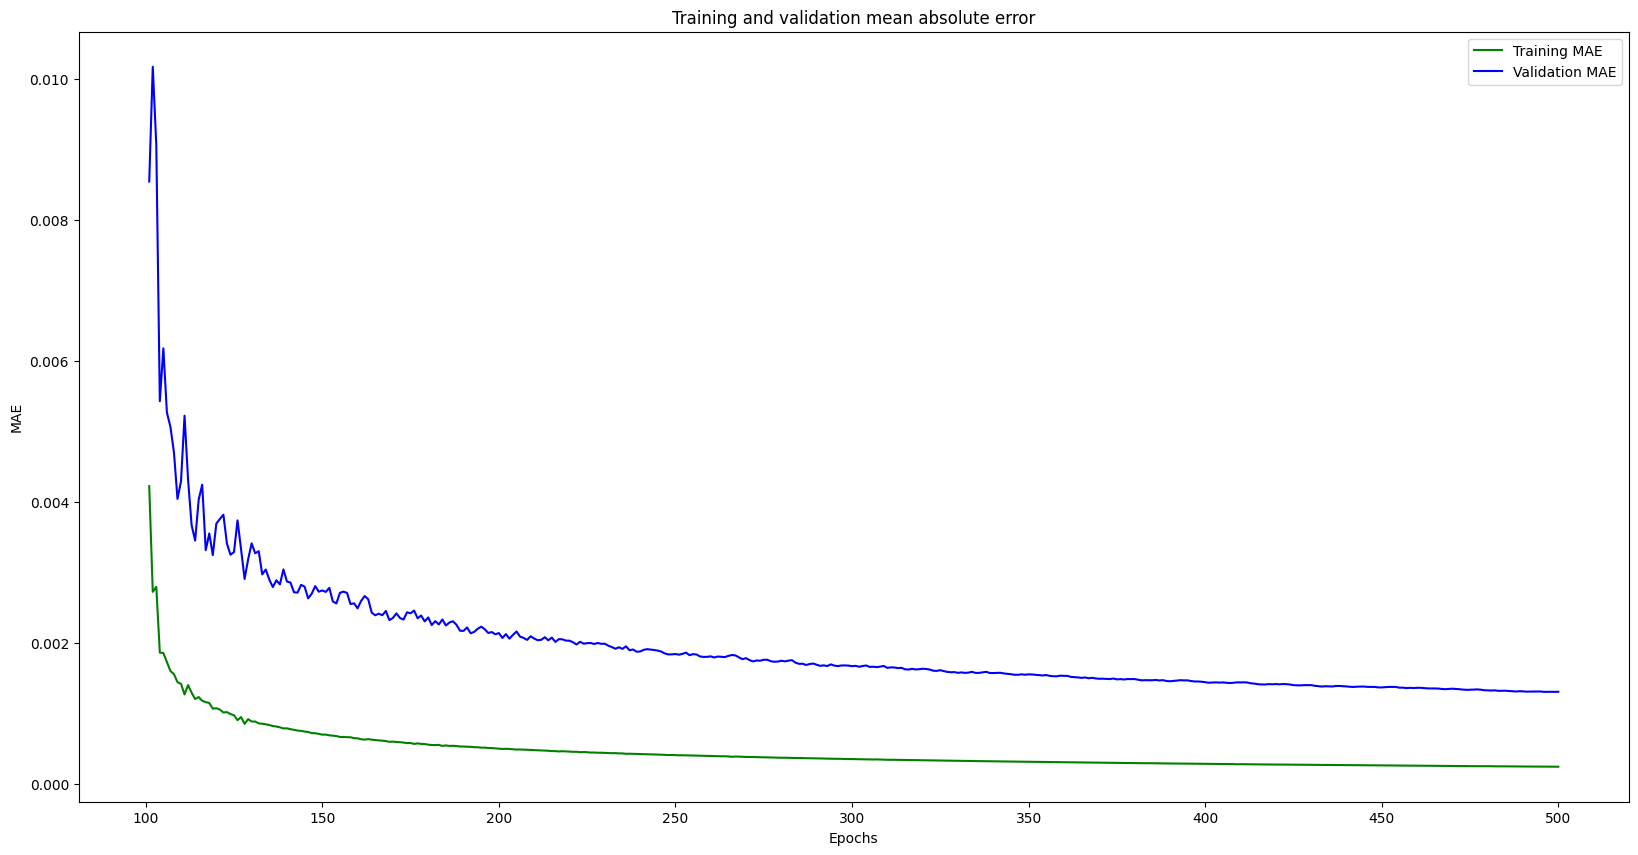

In [ ]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


### Run with Test Data

In [ ]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data


1/1 [==============================] - 0s 107ms/step
predictions =
 [[0.313 0.687]
 [0.591 0.409]
 [0.726 0.274]
 [0.794 0.206]
 [0.068 0.932]
 [0.918 0.082]
 [0.946 0.054]
 [0.949 0.051]
 [0.534 0.466]
 [0.002 0.998]
 [0.002 0.998]
 [0.791 0.209]]
actual =
 [[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


# Convert the Trained Model to Tensor Flow Lite

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)



Model is 148364 bytes


## Encode the Model in an Arduino Header File

In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 914,946 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


# Classifying IMU Data


In [ ]:
import tensorflow as tf

# Path to your TFLite model file
tflite_model_path = 'gesture_model.tflite'

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get model details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Model Input Details:")
for input_detail in input_details:
    print(input_detail)

print("\nModel Output Details:")
for output_detail in output_details:
    print(output_detail)


Model Input Details:
{'name': 'serving_default_dense_59_input:0', 'index': 0, 'shape': array([  1, 714], dtype=int32), 'shape_signature': array([ -1, 714], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}

Model Output Details:
{'name': 'StatefulPartitionedCall:0', 'index': 10, 'shape': array([1, 2], dtype=int32), 'shape_signature': array([-1,  2], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


In [ ]:
# ...

# Get detailed layer information and parameter count
print("\nLayer Information and Parameter Count:")
total_params = 0
for i, detail in enumerate(interpreter.get_tensor_details()):
    params = 1
    for dim in detail['shape']:
        params *= dim
    total_params += params
    print(f"Layer {i}: {detail['name']}, Shape: {detail['shape']}, Parameters: {params}")

print(f"\nTotal Parameters: {total_params}")



Layer Information and Parameter Count:
Layer 0: serving_default_dense_59_input:0, Shape: [  1 714], Parameters: 714
Layer 1: sequential_15/dense_61/BiasAdd/ReadVariableOp, Shape: [2], Parameters: 2
Layer 2: sequential_15/dense_60/BiasAdd/ReadVariableOp, Shape: [15], Parameters: 15
Layer 3: sequential_15/dense_59/BiasAdd/ReadVariableOp, Shape: [50], Parameters: 50
Layer 4: sequential_15/dense_59/MatMul, Shape: [ 50 714], Parameters: 35700
Layer 5: sequential_15/dense_60/MatMul, Shape: [15 50], Parameters: 750
Layer 6: sequential_15/dense_61/MatMul, Shape: [ 2 15], Parameters: 30
Layer 7: sequential_15/dense_59/MatMul;sequential_15/dense_59/Relu;sequential_15/dense_59/BiasAdd, Shape: [ 1 50], Parameters: 50
Layer 8: sequential_15/dense_60/MatMul;sequential_15/dense_60/Relu;sequential_15/dense_60/BiasAdd, Shape: [ 1 15], Parameters: 15
Layer 9: sequential_15/dense_61/MatMul;sequential_15/dense_61/BiasAdd, Shape: [1 2], Parameters: 2
Layer 10: StatefulPartitionedCall:0, Shape: [1 2], Para